In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import math
from fitter import Fitter, get_common_distributions, get_distributions


In [2]:
df = pd.read_csv("/Users/rmrking8d/Documents/Boston College/UChicago Trading 2023/Training Data_Case 3.csv")
df.rename(columns={"Unnamed: 0": "Day",},
          inplace=True, errors="raise")

Plot Prices

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


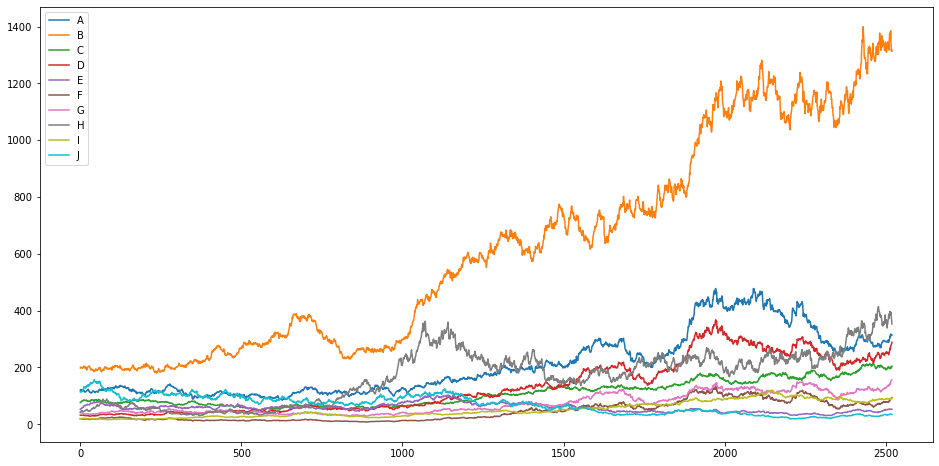

In [3]:
plt.figure(figsize=(16,8))
plt.legend()
for i in range(ord("A"), ord("J")+1):
    plt.plot(df[str(chr(i))], label = str(chr(i)))
plt.legend()


Adding Pct Chng, Plotting Pct Chng, Hist

In [4]:
for i in range(ord("A"), ord("J")+1):
    df[str(chr(i))+"_Pct_Change"] = df[str(chr(i))].pct_change() 

#plt.figure(figsize=(120,30))
#for i in range(ord("A"), ord("J")+1):
    #plt.subplot(10,1,i-64)
    #plt.plot(df[str(chr(i))+"_Pct_Change"])


In [5]:
plt.figure(figsize=(16,8))
plt.figure(figsize=(200,100))
for i in range(ord("A"), ord("J")+1):
    plt.subplot(10,1,i-64)
    plt.axvline(0, c="red")
    plt.hist(df[str(chr(i))+"_Pct_Change"], bins = 100)


<Figure size 1152x576 with 0 Axes>

Examining Dist of Individ Stocks. 

 Fitter Code 
B = Fitter(df["B_Pct_Change"][1:],
           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
B.fit()
B.summary()


Text(0.5, 0, 'Return of A')

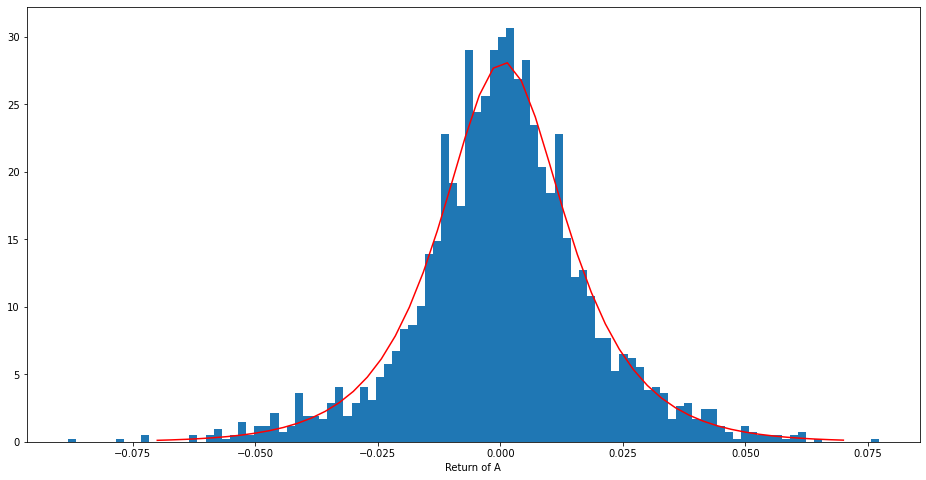

In [6]:
## Best Hypsecant 176
plt.figure(figsize = (16,8))
plt.hist(df["A_Pct_Change"], bins = 100, density = True)

[A_loc_fit, A_scale_fit] = scipy.stats.hypsecant.fit(df["A_Pct_Change"][1:])

plt.plot(np.linspace(-0.07,0.07),scipy.stats.hypsecant.pdf(np.linspace(-0.07,0.07),A_loc_fit, A_scale_fit), c = "red")
plt.xlabel("Return of A")

#### Fitter Code ####
#A = Fitter(df["A_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#A.fit()
#A.summary()



Text(0.5, 0, 'Return of B')

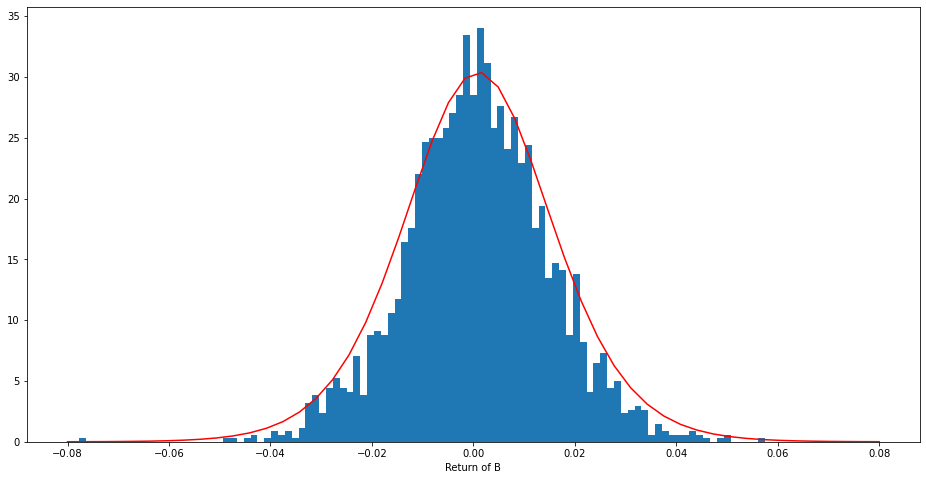

In [7]:
## Best Norm-inv-gauss
plt.figure(figsize = (16,8))
plt.hist(df["B_Pct_Change"], bins = 100, density = True)

[B_a_fit, B_b_fit, B_loc_fit, B_scale_fit] = scipy.stats.norminvgauss.fit(df["B_Pct_Change"][1:])

plt.plot(np.linspace(-0.08,0.08),scipy.stats.norminvgauss.pdf(np.linspace(-0.07,0.07),B_a_fit, B_b_fit, B_loc_fit, B_scale_fit), c = "red")
plt.xlabel("Return of B")


#### Fitter Code ####
#B = Fitter(df["B_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#B.fit()
#B.summary()

Text(0.5, 0, 'Return of C')

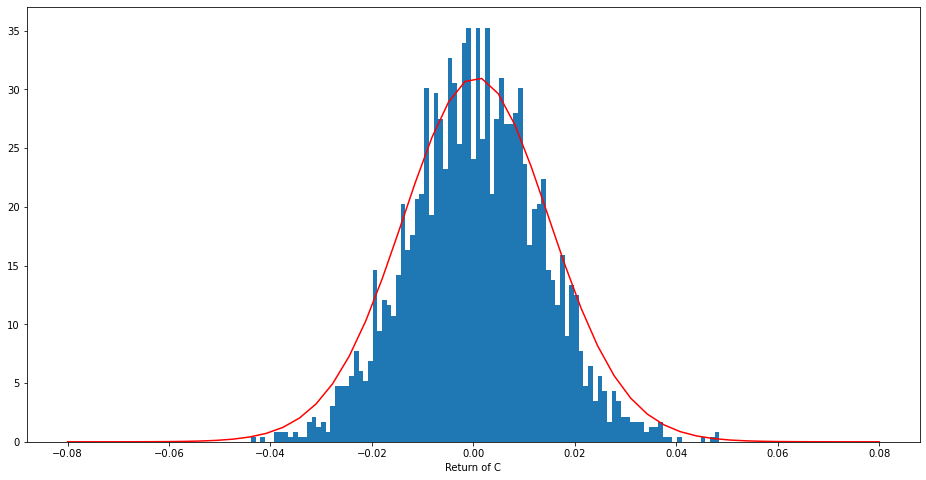

In [8]:
## Best t 619
plt.figure(figsize = (16,8))
plt.hist(df["C_Pct_Change"], bins = 100, density = True)

[C_df_fit, C_loc_fit, C_scale_fit] = scipy.stats.t.fit(df["C_Pct_Change"][1:])

plt.plot(np.linspace(-0.08,0.08),scipy.stats.t.pdf(np.linspace(-0.07,0.07),C_df_fit, C_loc_fit, C_scale_fit), c = "red")
plt.xlabel("Return of C")

#### Fitter Code ####
# = Fitter(df["C_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#C.fit()
#C.summary()

Text(0.5, 0, 'Return of D')

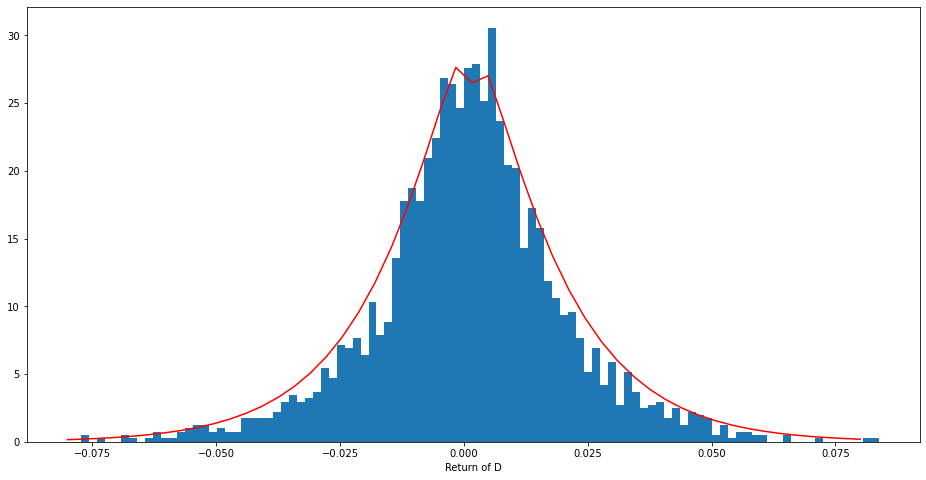

In [9]:
### Best dweibull 126
plt.figure(figsize = (16,8))
plt.hist(df["D_Pct_Change"], bins = 100, density = True)

[D_x_fit,D_loc_fit, D_scale_fit] = scipy.stats.dweibull.fit(df["D_Pct_Change"][1:])

plt.plot(np.linspace(-0.08,0.08),scipy.stats.dweibull.pdf(np.linspace(-0.07,0.07),D_x_fit,D_loc_fit, D_scale_fit), c = "red")
plt.xlabel("Return of D")

#### Fitter Code ####
#D = Fitter(df["D_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#D.fit()
#D.summary()

Text(0.5, 0, 'Return of E')

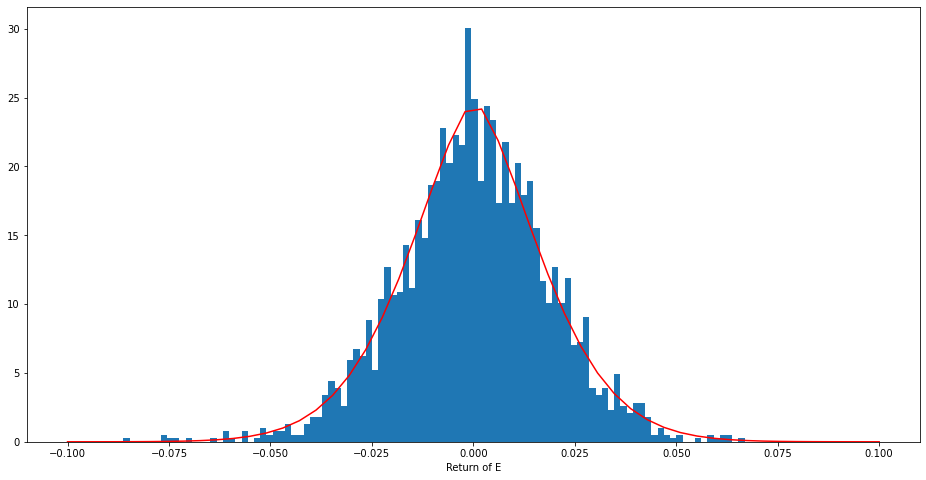

In [10]:
### Best Gen Norm 209
plt.figure(figsize = (16,8))
plt.hist(df["E_Pct_Change"], bins = 100, density = True)

[E_a_fit, E_loc_fit, E_scale_fit] = scipy.stats.gennorm.fit(df["E_Pct_Change"][1:])

plt.plot(np.linspace(-0.1,0.1),scipy.stats.gennorm.pdf(np.linspace(-0.1,0.1),E_a_fit,E_loc_fit, E_scale_fit), c = "red")
plt.xlabel("Return of E")


#### Fitter Code ####
#E = Fitter(df["E_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#E.fit()
#E.summary()

Text(0.5, 0, 'Return of F')

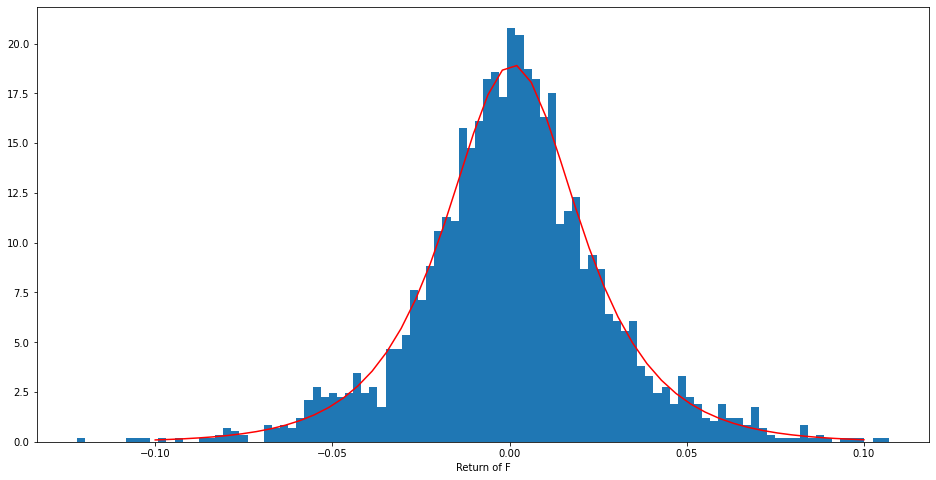

In [11]:
### Best hypsecant 58.07
plt.figure(figsize = (16,8))
plt.hist(df["F_Pct_Change"], bins = 100, density = True)

[F_loc_fit, F_scale_fit] = scipy.stats.hypsecant.fit(df["F_Pct_Change"][1:])

plt.plot(np.linspace(-0.1,0.1),scipy.stats.hypsecant.pdf(np.linspace(-0.1,0.1),F_loc_fit, F_scale_fit), c = "red")
plt.xlabel("Return of F")

#### Fitter Code ####
#F = Fitter(df["F_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#F.fit()
#F.summary()

Text(0.5, 0, 'Return of G')

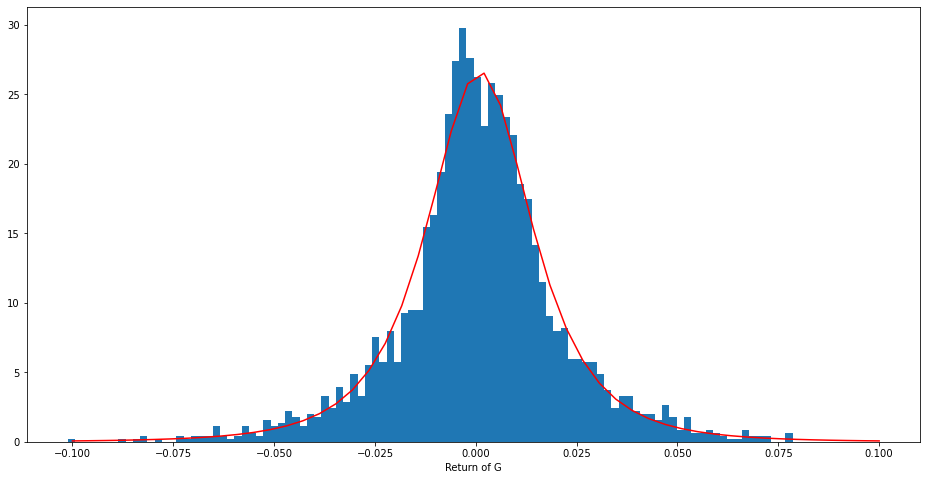

In [12]:
### Best Johnson Su 131
plt.figure(figsize = (16,8))
plt.hist(df["G_Pct_Change"], bins = 100, density = True)

[G_a_fit,G_b_fit,G_loc_fit, G_scale_fit] = scipy.stats.johnsonsu.fit(df["G_Pct_Change"][1:])

plt.plot(np.linspace(-0.1,0.1),scipy.stats.johnsonsu.pdf(np.linspace(-0.1,0.1),G_a_fit,G_b_fit,G_loc_fit, G_scale_fit), c = "red")
plt.xlabel("Return of G")

#### Fitter Code ####
#G = Fitter(df["G_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#G.fit()
#G.summary()

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


Text(0.5, 0, 'Return of H')

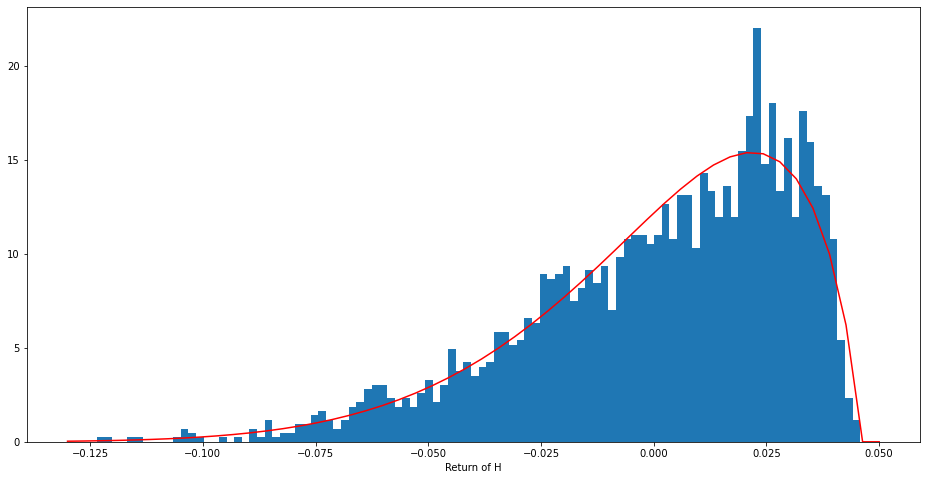

In [13]:
### Best Beta 205
plt.figure(figsize = (16,8))
plt.hist(df["H_Pct_Change"], bins = 100, density = True)

[H_a_fit,H_b_fit,H_loc_fit, H_scale_fit] = scipy.stats.beta.fit(df["H_Pct_Change"][1:])

plt.plot(np.linspace(-.13,0.05),scipy.stats.beta.pdf(np.linspace(-.13,0.05),H_a_fit,H_b_fit,H_loc_fit, H_scale_fit), c = "red")
plt.xlabel("Return of H")

#### Fitter Code ####
#H = Fitter(df["H_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#H.fit()
#H.summary()

Text(0.5, 0, 'Return of I')

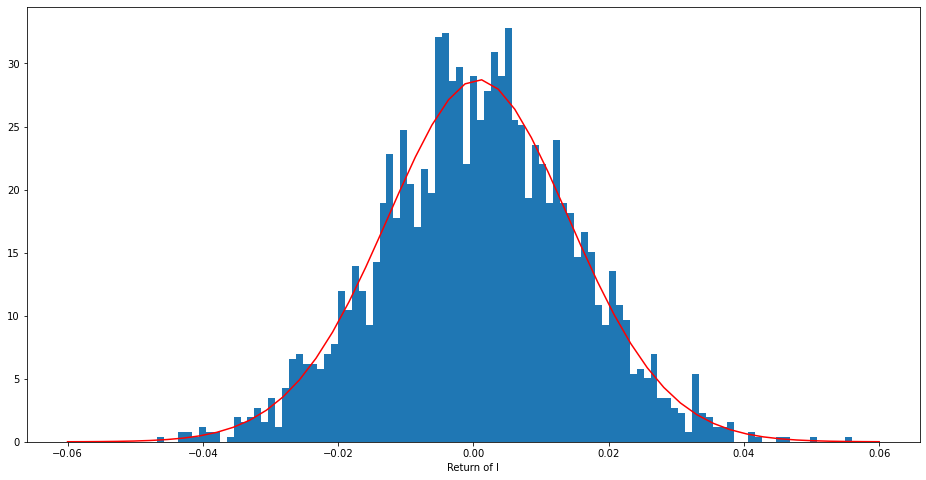

In [14]:
### Best gennoorm 450
plt.figure(figsize = (16,8))
plt.hist(df["I_Pct_Change"], bins = 100, density = True)

[I_a_fit, I_loc_fit, I_scale_fit] = scipy.stats.gennorm.fit(df["I_Pct_Change"][1:])

plt.plot(np.linspace(-0.06,0.06),scipy.stats.gennorm.pdf(np.linspace(-0.06,0.06),I_a_fit,I_loc_fit, I_scale_fit), c = "red")
plt.xlabel("Return of I")
#### Fitter Code ####
#I = Fitter(df["I_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#I.fit()
#I.summary()

Text(0.5, 0, 'Return of J')

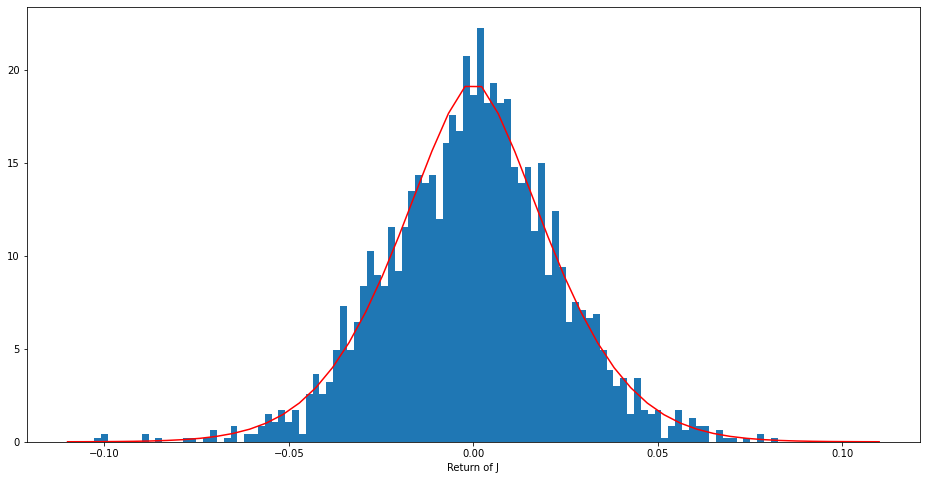

In [15]:
### Best gennorm 115
plt.figure(figsize = (16,8))
plt.hist(df["J_Pct_Change"], bins = 100, density = True)

[J_a_fit, J_loc_fit, J_scale_fit] = scipy.stats.gennorm.fit(df["J_Pct_Change"][1:])

plt.plot(np.linspace(-0.11,0.11),scipy.stats.gennorm.pdf(np.linspace(-0.11,0.11),J_a_fit,J_loc_fit, J_scale_fit), c = "red")
plt.xlabel("Return of J")
#### Fitter Code ####
#### Fitter Code ####
#J = Fitter(df["J_Pct_Change"][1:],
#           distributions=['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm',
#'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwo', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2',
#'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'rv_continuous', 'rv_histogram', 'semicircular', 'skewnorm', 't', 'trapz', 'triang', 'truncexpon', 'truncnorm', 'tukeylambda', 'uniform', 'vonmises', 'vonmises_line', 'wald', 'weibull_max', 'weibull_min', 'wrapcauchy'])
#J.fit()
#J.summary()

Collecting Moments 

In [16]:
print('First Four Moments of Stocks A-J (Based on fitted dist)')
print('______________________________________________________')
A_mean, A_var, A_skew, A_kurt = scipy.stats.hypsecant.stats(A_loc_fit,A_scale_fit, moments = 'mvsk')
print(f'A_mean = {A_mean}, A_var = {A_var}, A_skew = {A_skew}, A_kurt = {A_kurt}')

B_mean, B_var, B_skew, B_kurt = scipy.stats.norminvgauss.stats(B_a_fit, B_b_fit, B_loc_fit, B_scale_fit, moments = 'mvsk')
print(f'B_mean = {B_mean}, B_var = {B_var}, B_skew = {B_skew}, B_kurt = {B_kurt}')

C_mean, C_var, C_skew, C_kurt = scipy.stats.t.stats(C_df_fit, C_loc_fit,C_scale_fit, moments = 'mvsk')
print(f'C_mean = {C_mean}, C_var = {C_var}, C_skew = {C_skew}, C_kurt = {C_kurt}')

D_mean, D_var, D_skew, D_kurt = scipy.stats.dweibull.stats(D_x_fit, D_loc_fit, D_scale_fit, moments = 'mvsk')
print(f'D_mean = {D_mean}, D_var = {D_var}, D_skew = {D_skew}, D_kurt = {D_kurt}')

E_mean, E_var, E_skew, E_kurt = scipy.stats.gennorm.stats(E_a_fit, E_loc_fit, E_scale_fit, moments = 'mvsk')
print(f'E_mean = {E_mean}, E_var = {E_var}, E_skew = {E_skew}, E_kurt = {E_kurt}')

F_mean, F_var, F_skew, F_kurt = scipy.stats.hypsecant.stats(F_loc_fit,F_scale_fit, moments = 'mvsk')
print(f'F_mean = {F_mean}, F_var = {F_var}, F_skew = {F_skew}, F_kurt = {F_kurt}')

G_mean, G_var, G_skew, G_kurt = scipy.stats.johnsonsu.stats(G_a_fit,G_b_fit,G_loc_fit, G_scale_fit, moments = 'mvsk')
print(f'G_mean = {G_mean}, G_var = {G_var}, G_skew = {G_skew}, G_kurt = {G_kurt}')

H_mean, H_var, H_skew, H_kurt = scipy.stats.beta.stats(H_a_fit, H_b_fit, H_loc_fit, H_scale_fit, moments = 'mvsk')
print(f'H_mean = {H_mean}, H_var = {H_var}, H_skew = {H_skew}, H_kurt = {H_kurt}')

I_mean, I_var, I_skew, I_kurt = scipy.stats.gennorm.stats(I_a_fit, I_loc_fit, I_scale_fit, moments = 'mvsk')
print(f'I_mean = {I_mean}, I_var = {I_var}, I_skew = {I_skew}, I_kurt = {I_kurt}')

J_mean, J_var, J_skew, J_kurt = scipy.stats.gennorm.stats(J_a_fit, J_loc_fit, J_scale_fit, moments = 'mvsk')
print(f'J_mean = {J_mean}, J_var = {J_var}, J_skew = {J_skew}, J_kurt = {J_kurt}')



First Four Moments of Stocks A-J (Based on fitted dist)
______________________________________________________
A_mean = 0.0006407591873842683, A_var = 0.00031559764779798494, A_skew = 0.0, A_kurt = 2.0
B_mean = 0.0008509494473713534, B_var = 0.00020028412549867618, B_skew = 0.012623215792481336, B_kurt = 0.6664261513046024
C_mean = 0.0004650690175960133, C_var = 0.00017118097148564955, C_skew = 0.0, C_kurt = 0.14528333900438672
D_mean = 0.0010982690650107848, D_var = 0.00036802255898495974, D_skew = 0.0, D_kurt = 1.9933698374239341
E_mean = 0.0002304288489612107, E_var = 0.00034530089304221124, E_skew = 0.0, E_kurt = 0.5798442977589406
F_mean = 0.0008586372390550236, F_var = 0.0006968771695498615, F_skew = 0.0, F_kurt = 2.0
G_mean = 0.0007956607505279841, G_var = 0.00046730123147359224, G_skew = -0.06324984063814111, G_kurt = 9.330631267492864
H_mean = 0.0012434753566838985, H_var = 0.0008521258345262973, H_skew = -0.9565692016841115, H_kurt = 0.8242854630229269
I_mean = 0.000718808700

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1826: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


Calculating Cov Matrix